# Table of Contents
 <p><div class="lev2 toc-item"><a href="#1次元の線形最小二乗法" data-toc-modified-id="1次元の線形最小二乗法-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>1次元の線形最小二乗法</a></div><div class="lev2 toc-item"><a href="#2次元の最小二乗フィット" data-toc-modified-id="2次元の最小二乗フィット-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>2次元の最小二乗フィット</a></div>

<br />

<div style="text-align: center;">
<font size="7">線形最小二乗法の課題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4"> 18/11/9 西谷滋人　</font>
</div>

##  1次元の線形最小二乗法

次の4点のデータを$y = a_0+a_1 x+a_2 x^2$で近似せよ(2006年度期末試験)．
```python
xdata = np.array([1,2,3,4])
ydata = np.array([1,3,4,10])
```



<IPython.core.display.Javascript object>


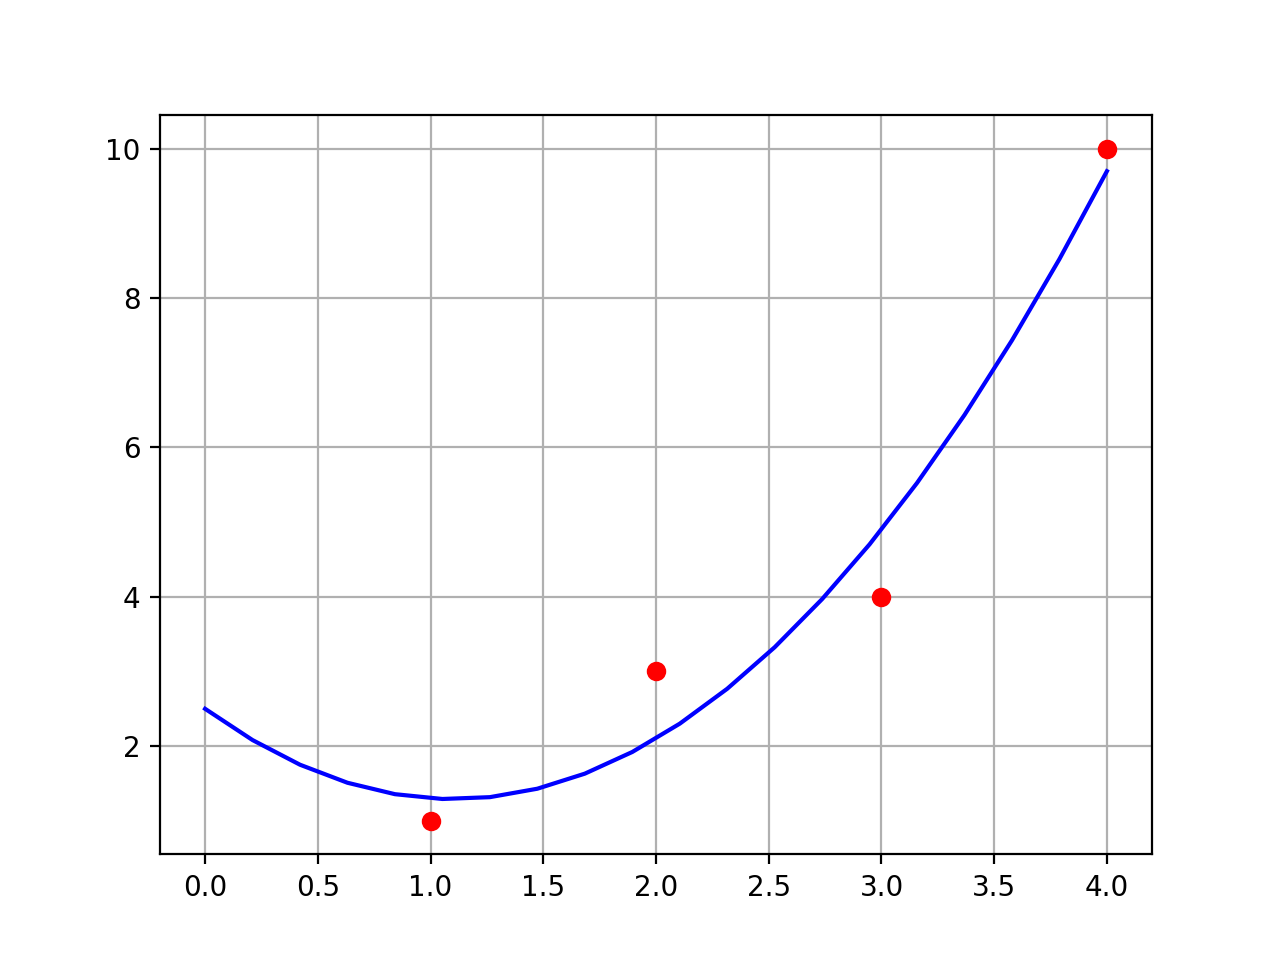

[ 2.5 -2.2  1. ]


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a0, a1, a2):
    return a0 + a1*x + a2*x**2

xdata = np.array([1,2,3,4])
ydata = np.array([1,3,4,10])
plt.plot(xdata,ydata, 'o', color='r')

params, cov = curve_fit(f, xdata, ydata)
print(params)

x =np.linspace(0,4,20)
y = f(x,params[0],params[1],params[2])
plt.plot(x,y, color='b')

plt.grid()
plt.show()


##  2次元の最小二乗フィット

以下のデータを

$$
f(x, y) = a_0+a_1 x+a_2 y+a_3 xy
$$
で近似せよ
```python
 x,  y,  z
-1, -1,  2.00000
-1,  0,  0.50000
-1,  1, -1.00000
 0, -1,  0.50000
 0,  0,  1.00000
 0,  1,  1.50000
 1, -1, -1.00000
 1,  0,  1.50000
 1,  1,  4.00000
```

In [1]:
import numpy as np
z = np.array([2.00000,
0.50000,
-1.00000,
0.50000,
1.00000,
1.50000,
-1.00000,
1.50000,
4.00000])
x = []
y = []
for i in range(-1,2):
    for j in range(-1,2):
        x.append(i)
        y.append(j)



<IPython.core.display.Javascript object>


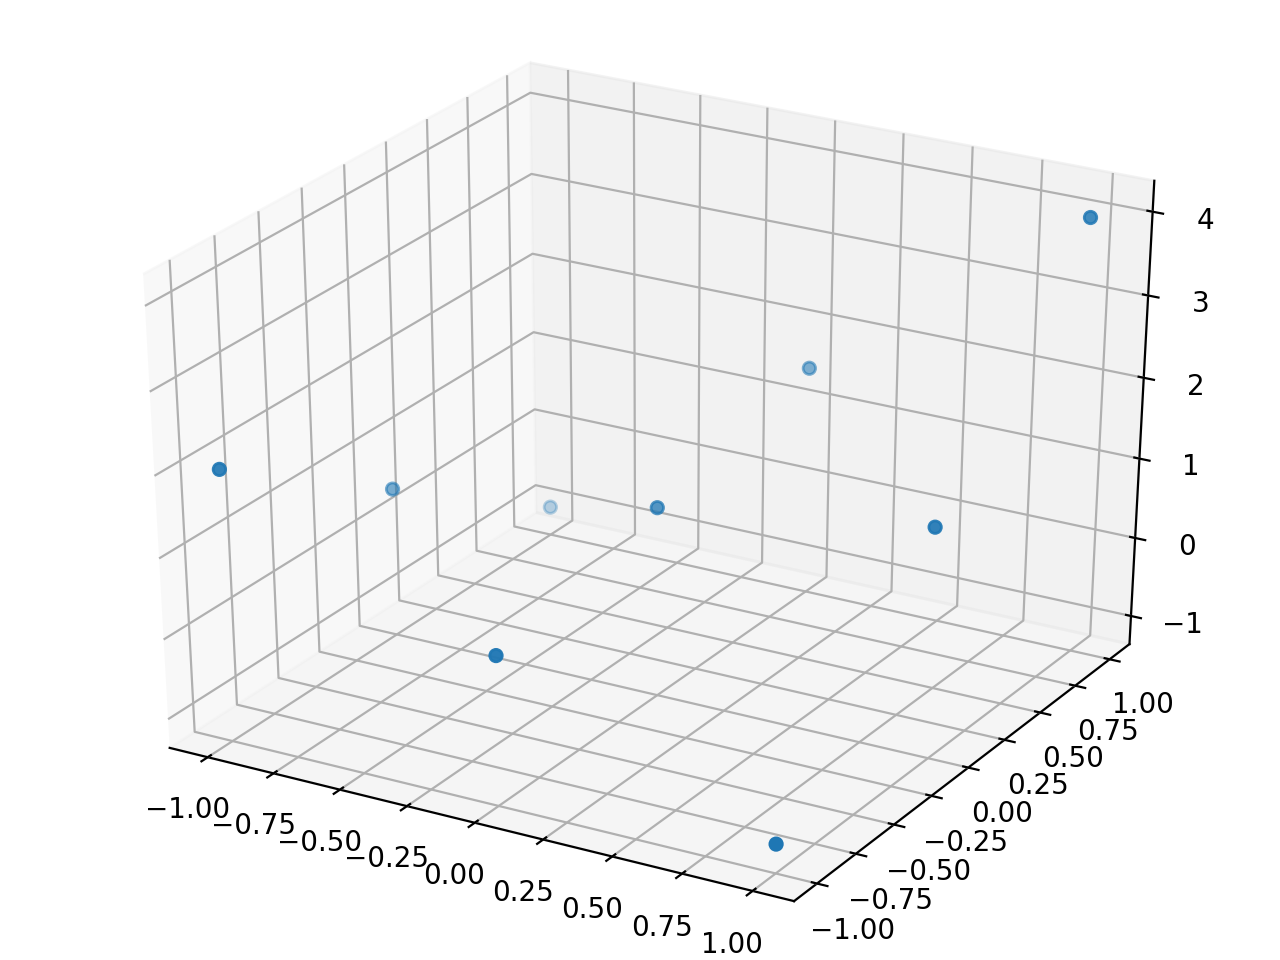

In [2]:
%matplotlib notebook
# 保存のためのコマンド．kernel restartがいるかも．
# import matplotlib
# matplotlib.use('Agg')

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.scatter3D(np.array(x),np.array(y),z) 

plt.show()

In [3]:
from pprint import pprint
import scipy.linalg as linalg

n = z.size
n_j = 4
bb=np.zeros([n])
A=np.zeros([n,n_j])
for i in range(0,n):
    A[i,0]=1
    A[i,1]=x[i]
    A[i,2]=y[i]
    A[i,3]=x[i]*y[i]
    bb[i]=z[i]

c, resid, rank, sigma = linalg.lstsq(A, bb)
pprint(c)

Ai = linalg.inv(np.dot(np.transpose(A),A))
b = np.dot(np.transpose(A),bb)
np.dot(Ai,b)

array([ 1. ,  0.5,  0.5,  2. ])


array([ 1. ,  0.5,  0.5,  2. ])

<IPython.core.display.Javascript object>


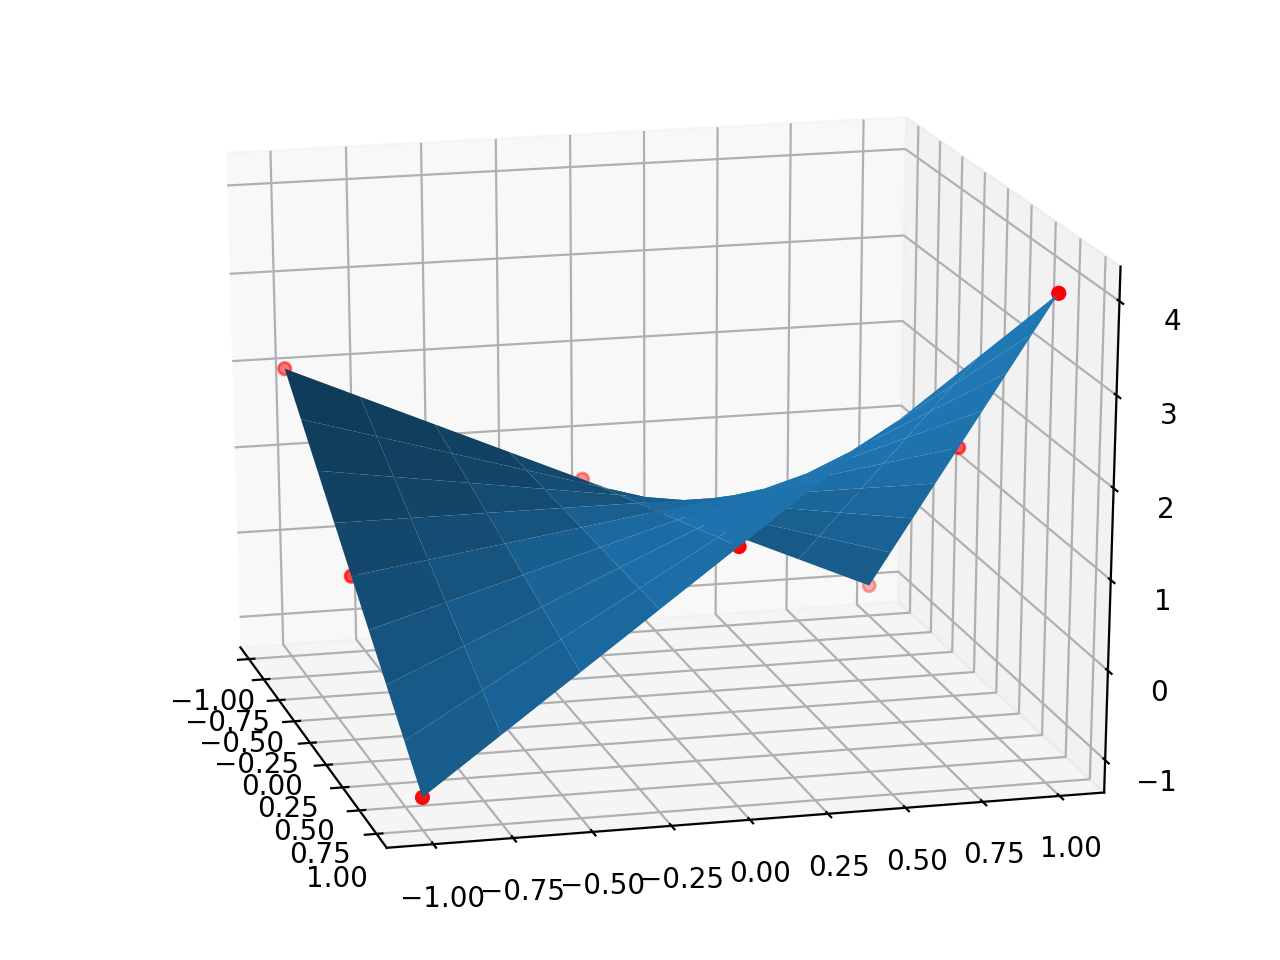

In [4]:
def z_surf(xx,yy):
    val = c[0] + c[1]*xx + c[2]*yy
    val += c[3]*xx*yy
    return val

x1 = np.arange(-1, 1.25, 0.25)
y1 = np.arange(-1, 1.25, 0.25)
X, Y = np.meshgrid(x1, y1)
Z1 = z_surf(X,Y)

fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.scatter(np.array(x),np.array(y),z, color='r') 
plot3d.plot_surface(X,Y,Z1) 

plt.show()

In [5]:
# plt.savefig("result.png")
